 Classification:

 1. Linear regression
 2. Logistic regression

 3. Support vector machine


# Linear regression

1. Generate 1D data synthetically
2. Take the earlier designed linear regression class
3. Find the fitting line 
4. Taking 0.5 as threshold, see the classification    

(200,)
(200, 1)
(200, 1)


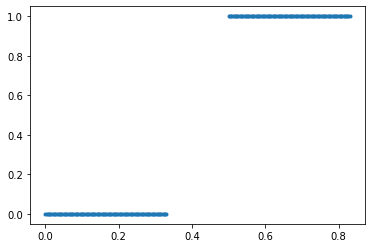

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=list(range(100))+list(range(150,250))
x=np.array(x)/300
print(x.shape)
x=x.reshape((200,1))
print(x.shape)
y=np.array([1 if i>0.49 else 0 for i in x])
y=y.reshape((200,1))
print(y.shape)
# insert your code here
plt.plot(x,y,".")

In [ ]:
x.shape

(200, 1)

Defining linear regression class

In [ ]:
# linear regression class
class lin_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w= w_old + 2*lr*(np.mean((y-x.T@w_old)*x.T))
    # insert your code here
    return w

  def error(self,w,y,x):
    return np.mean(np.square(y-x.T@w))
    # insert your code here

  def mat_inv(self,y,x_aug):
    return np.matmul(np.linalg.pinv(np.matmul(x_aug,x_aug.T)),np.matmul(x_aug,y))
    # insert your code here
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w=np.random.randn(m,1)
    err=[]
    for i in range(1000):
     # insert your code here
     err.append(self.error(w,y,x))
     w=self.grad_update(w,lr,y,x)
    err.append(self.error(w,y,x))
    w_pred=w
    return w_pred,err


Data augmentation and optimal weight generation

In [ ]:
# x=x[:,np.newaxis] 
x=x.T     # to make this in M x N format, where M is the dimension
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


ln_reg=lin_regression()
w_opt=ln_reg.mat_inv(y,x_aug)


(1, 200)
(2, 200)


In [ ]:
# (np.linalg.inv(x_aug @ x_aug.T) @ (x @ y))
np.linalg.pinv(x_aug @ x_aug.T)

array([[ 0.01700035, -0.0289165 ],
       [-0.0289165 ,  0.06967832]])

1. Optimal separating plane generation
2. Classification (0.5 as threshold)


In [ ]:
print(w_opt)

[[-0.22291255]
 [ 1.74195796]]


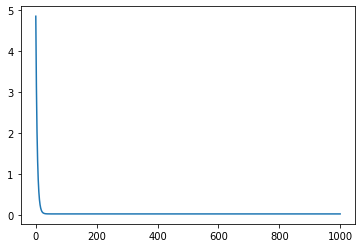

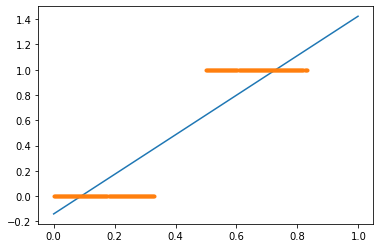

[[-0.14111501]
 [ 1.56631842]]


In [ ]:
lr=0.05
w_opt,ee=ln_reg.Regression_grad_des(x_aug,y,lr)
plt.figure()
plt.plot(ee)
x11=np.array(list(range(1000)))/1000
y11=x11*w_opt[1]+w_opt[0]
plt.figure()
plt.plot(x11,y11)
plt.plot(x.T,y,".")
plt.show()
print(w_opt)

## Draw back of linear regression based classification
1. Generate data (have outlairs noise)
2. Find the fitting line.
3. Using 0.5 as threshold, see the classification
4. using matrix inversion (home work)


(300,)
(300, 1)
(300, 1)


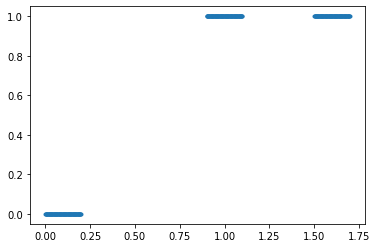

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=list(range(100))+list(range(450,550))+list(range(750,850))
x=np.array(x)/500
print(x.shape)
x=x.reshape((300,1))
print(x.shape)
y=np.array([1 if i>0.49 else 0 for i in x])
y=y.reshape((300,1))
print(y.shape)
# insert your code here
plt.plot(x,y,".")

Augment data

In [ ]:
# Augment data

# x=x[:,np.newaxis]
# y=y[:,np.newaxis]

x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)
print(x_aug.shape)



(2, 300)


1. find optimal weight
2. perform classification (0.5 as threshold)

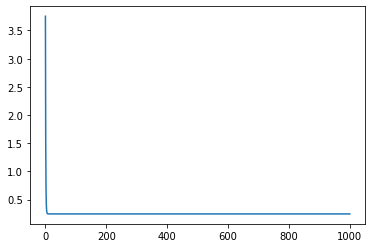

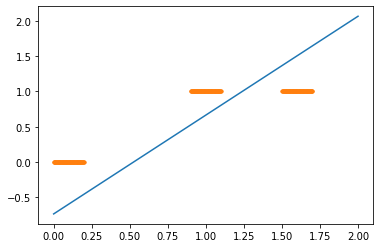

[[-0.73392856]
 [ 1.39983229]]


In [ ]:
lr=0.1
lin_reg=lin_regression()
w_opt,ee=ln_reg.Regression_grad_des(x_aug,y,lr)
plt.figure()
plt.plot(ee)
x11=np.array(list(range(1000)))/500
y11=x11*w_opt[1]+w_opt[0]
plt.figure()
plt.plot(x11,y11)
plt.plot(x,y,".")
plt.show()
print(w_opt)
# insert your code here

# logistic regression
1. Error surface (logistic loss vs. MSE)
2. Solve the outlair issue
3. Circularly separable data classification
4. Multiclass classification

## Error surface (logistic loss vs. MSE)

(25, 1) (25, 1)


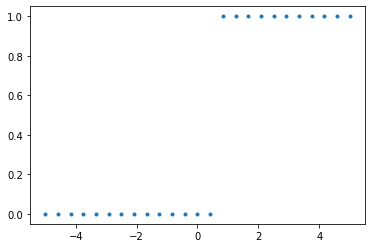

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25).reshape((25,1))
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1
print(x.shape,y.shape)
plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [ ]:
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)
print(w1[-1],w0)

[96.] [-17.5536]


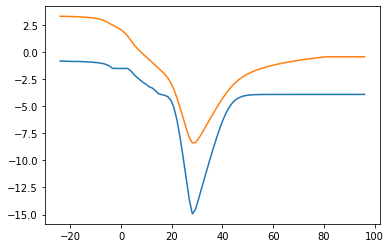

In [ ]:
def logistic_predict(w1,w0,x):
  return np.clip(1/(1+np.exp(-(w0+w1*x))).reshape(y.shape),0.000000000000000000001,0.9999999)

def Mse(y,y_pred):
  return np.mean(np.square(y-y_pred))/2

def Logistic_loss(y,y_pred):
  return float(-( y.T @ (np.log(y_pred)) + (1-y).T @ (np.log(1-y_pred)) )/len(y))

cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
  y_pred=logistic_predict(w1[i],w0,x)
  cost_mse=Mse(y,y_pred)
 # insert your code here
  cost_fn_mse.append(cost_mse)
  cost_logis=Logistic_loss(y,y_pred)# insert your code here
  cost_fn_logis.append(cost_logis)
# print(y_pred)
plt.figure()
plt.plot(w1,np.log(cost_fn_mse))
plt.plot(w1,np.log(cost_fn_logis).reshape(100,1))

## Solve the outlier issue


(300,)
(300, 1)
(300, 1)


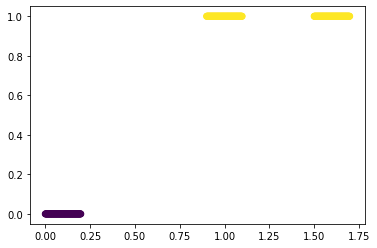

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=list(range(100))+list(range(450,550))+list(range(750,850))
x=np.array(x)/500
print(x.shape)
x=x.reshape((300,1))
print(x.shape)
y=np.array([1 if i>0.49 else 0 for i in x])
y=y.reshape((300,1))
print(y.shape)
# insert your code here
plt.scatter(x,y,c=y)

In [ ]:
x[0]

array([0.])

In [ ]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable
  
  def logis(self,x,w_old):
    h=x.T @ w_old
    op = 1/(1+np.exp(-h))
    op=np.clip(op,0.000000000000000000001,0.9999999)
    # insert your code here
    return op

  def grad_update(self,w_old,lr,y,x):
    op = self.logis(x,w_old)
    w = w_old - lr*((x @ (op-y)))/len(y)
    # insert your code here
    return w

  def error(self,w,y,x):
    op = self.logis(x,w)
    return -(np.mean(y*np.log(op)+(1-y)*np.log(1-op)))
    # insert your code here

    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w=np.random.randn(m,1)
    err=[self.error(w,y,x)]
    for i in range(1000):
      w = self.grad_update(w,lr,y,x)
      e= self.error(w,y,x)
      dev = (err[-1]-e)*10000
      err.append(e)
      # insert your code here
      if dev<=10**(-20):
        break
    return w,err

In [ ]:
# augmentation and data formating

# x=x[:,np.newaxis]
# y=y[:,np.newaxis]
print(x.shape)
x_aug=np.concatenate((np.ones((1,x.shape[0])), x.T),axis=0)

x_aug.shape

(300, 1)


(2, 300)

[[-2.61614821]
 [ 5.21574693]]


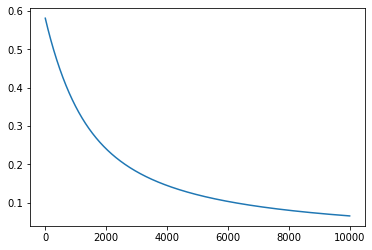

In [ ]:

log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug,y,0.01)
print(w_pred)

plt.plot(err)

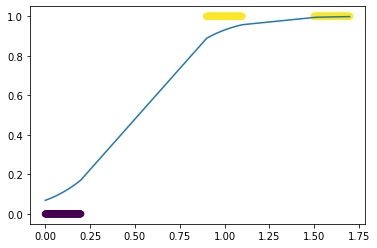

In [ ]:
op=log_reg.logis(x_aug,w_pred)
plt.figure()
plt.scatter(x,y,c=y)
plt.plot(x,op)

## Classification of circularly separated data using logistic regression



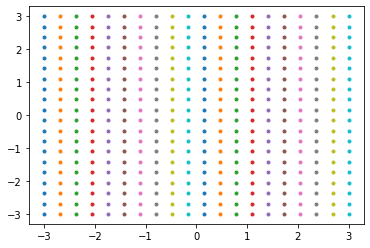

In [ ]:
# Generating circularly separated data
import numpy as np
import matplotlib.pyplot as plt


x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')


1. Circularly separated data generation

(400, 2)
(32, 2)
(332, 2)
(364, 2)


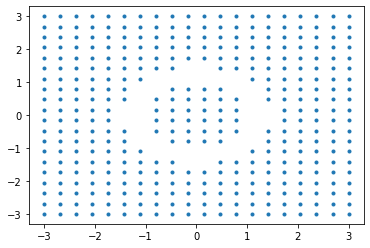

In [ ]:
x1=x11.flatten()
x2=x22.flatten()

x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1) # to make matrix format
print(x.shape)

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)

bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)
# print(aind)
x1=x[aind[0],:]
x2=x[bind[0],:]
print(x1.shape)
print(x2.shape)
x=np.concatenate((x1,x2))
print(x.shape)

plt.plot(x[:,0],x[:,1],'.')

As in case of circularly separated data, the boundary is nonlinear, so squred feature is taken.

(3, 364)


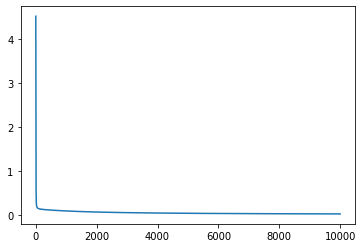

In [ ]:
# perform logistic regression

y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))

x_aug=np.concatenate((np.ones((1,x.shape[0])), (x.T)**2),axis=0)# insert your code here    # squring to learn circular separation
print(x_aug.shape)

log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug,y[:,np.newaxis],0.024)
plt.plot(err)


Plot classification using 0.5 as threshold

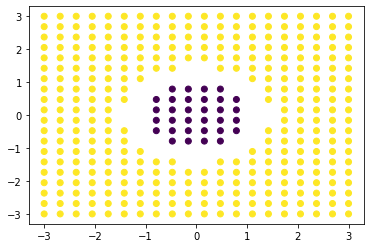

In [ ]:
y_pred=log_reg.logis(x_aug,w_pred)
plt.scatter(x[:,0],x[:,1],c=y_pred>0.5)

## Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. lets take polynomial of order 2 (by seeing the data distribution)

(300,)


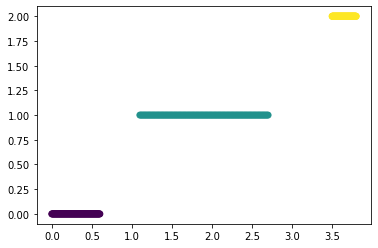

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.scatter(x,y,c=y)


In [ ]:
def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

In [ ]:
x_aug=data_transform(x[np.newaxis,:],2)
print(x_aug.shape)

(3, 300)


In [ ]:
# plot for classification
def plot_op(x,y_pred):
  yy=[1 if i>0.5 else 0 for i in y_pred]
  plt.scatter(x,yy,c=yy)
  # insert your code here

  # x0=x[ind0,:]
  # x1=x[ind1,:]


  # plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  # plt.plot(x1,np.ones((x1).shape),'x',color='r')

[[-3.49911996]
 [ 1.22119725]
 [ 2.59105886]]


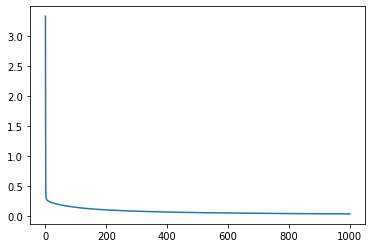

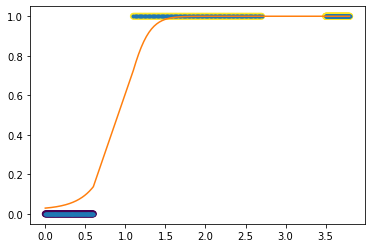

In [ ]:
# take class 0 as '0' and other to '1'
# insert your code here
y1_mod=(y!=0)
log_reg=logis_regression()
w1_pred,err=log_reg.Regression_grad_des(x_aug,y1_mod[:,np.newaxis],0.1)

plt.plot(err)
print(w1_pred)


# ploting
plt.figure()
plt.plot(x,y1_mod,'.')

y1_pred=log_reg.logis(x_aug,w1_pred)
plt.plot(x,y1_pred[:,0])
plot_op(x[:,np.newaxis],y1_pred)



[[ 2.91921571]
 [-5.07044979]
 [ 1.3824636 ]]


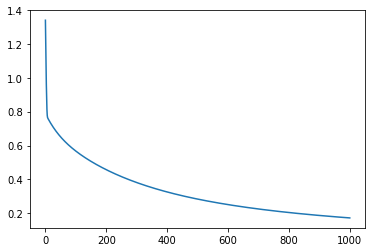

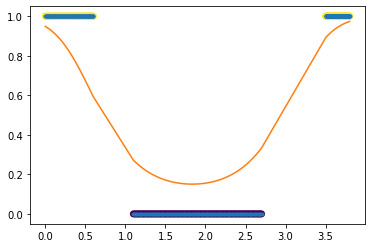

In [ ]:
# take class 1 as '0' and other to '1'
# insert your code here

y2_mod=(y!=1)
log_reg=logis_regression()
w2_pred,err=log_reg.Regression_grad_des(x_aug,y2_mod[:,np.newaxis],0.1)
plt.plot(err)
print(w2_pred)
# ploting
plt.figure()
plt.plot(x,y2_mod,'.')

y2_pred=log_reg.logis(x_aug,w2_pred)
plt.plot(x,y2_pred[:,0])
plot_op(x[:,np.newaxis],y2_pred)


[[ 4.50750099]
 [ 2.0919366 ]
 [-1.21724381]]


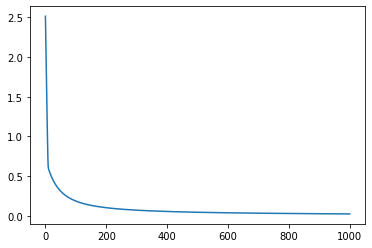

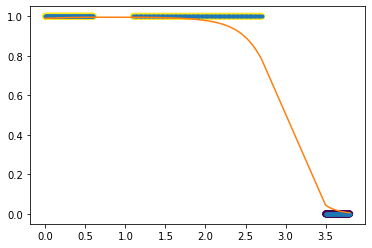

In [ ]:
# take class 2 as '0' and other to '1'
# insert your code here
# ploting
y3_mod=(y!=2)
log_reg=logis_regression()
w3_pred,err=log_reg.Regression_grad_des(x_aug,y3_mod[:,np.newaxis],0.1)
plt.plot(err)
print(w3_pred)

plt.figure()
plt.plot(x,y3_mod,'.')


y3_pred=log_reg.logis(x_aug,w3_pred)
plt.plot(x,y3_pred[:,0])

plot_op(x[:,np.newaxis],y3_pred)

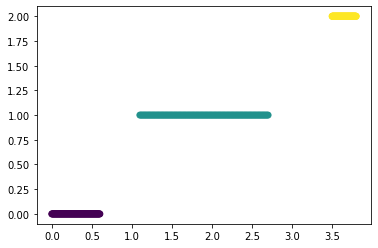

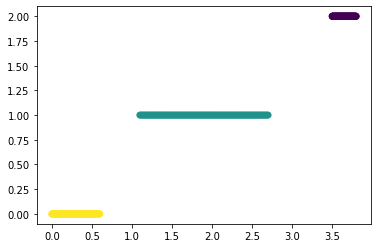

In [ ]:
yyy=y1_mod*0+y2_mod*1+y3_mod*2
plt.figure()
plt.scatter(x,y,c=y)
plt.figure()
plt.scatter(x,y,c=yyy)

# Support vector machine

1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$












Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


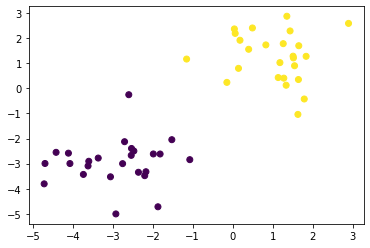

In [ ]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [ ]:
postiveX=[]
negativeX=[]
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [ ]:
def SVM_Training(data_dict):
  i=0
  length_Wvector = {}
  transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
  max_feature_value=max( np.amax(data_dict[-1]) , np.amax(data_dict[1]) )
        
  learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001]
  b_step_size = 2
  b_multiple = 5
  w_optimum = max_feature_value*0.5

  for lrate in learning_rate:
      
      w = np.array([w_optimum,w_optimum])     
      optimized = False
      while not optimized:
          #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
          for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
              for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                  w_t = w*transformation
                  
                  correctly_classified = True
                  
                  # every data point should be correct
                  for yi in data_dict:
                      for xi in data_dict[yi]:
                          if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                              correctly_classified = False
                              
                  if correctly_classified:
                      length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
          
          if w[0] < 0:
              optimized = True
          else:
              w = w - lrate

      norms = sorted([n for n in length_Wvector])
      
      minimum_wlength = length_Wvector[norms[0]]
      w = minimum_wlength[0]
      b = minimum_wlength[1]
  return w,b

In [ ]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):
  
    # insert your code here
    
  return w,b



**Training**

In [ ]:
w=[] #weights 2 dimensional vector
b=[] #bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

KeyboardInterrupt: ignored

In [ ]:

#all the required variables 
w=[] #weights 2 dimensional vector
b=[] #bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.75384537 0.75384537]
1.6351792900618864


## Visualization of the SVM separating hyperplanes (after training)

In [ ]:
def visualize(data_dict):
       
        
        
        
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

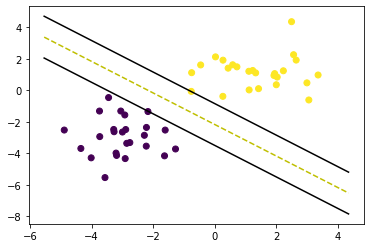

In [ ]:
fig = plt.figure()
visualize(data_dict)

## Testing

1. Generate test data as like training
2. See the classification

3. if $wx_{test}+b > 0$, $y_{test}=1$ else $y_{test}=-1$


In [ ]:
def predict(data,w,b):
  y_pred=np.sign(np.dot(data,w)+b)
  return y_pred

test accuracy= 100.0


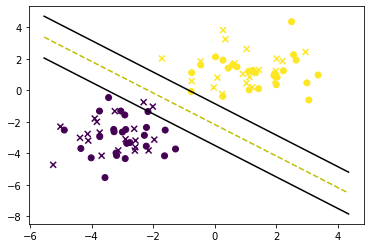

In [ ]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred=predict(test_data,w,b)
accuracy=# insert your code here
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)


